In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
#data preprocessing

In [20]:
import os
import shutil
from PIL import Image

# Define the root directory
root_dir = r'C:\Users\ADMIN\Downloads\CEDAR\CEDAR'

# Define the new directories
new_fake_dir = os.path.join(root_dir, 'new', 'Fake')
new_real_dir = os.path.join(root_dir, 'new', 'Real')

# Create new directories if they don't exist
os.makedirs(new_fake_dir, exist_ok=True)
os.makedirs(new_real_dir, exist_ok=True)

# Define the desired size
desired_size = (564, 301)

# Iterate through each folder
for folder_num in range(1, 56):
    folder_path = os.path.join(root_dir, str(folder_num))
    
    # Iterate through files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file starts with 'f' or 'o'
        if filename.startswith('f') or filename.startswith('o'):
            src = os.path.join(folder_path, filename)
            img = Image.open(src)
            # Resize the image
            img = img.resize(desired_size, Image.LANCZOS)  # Use Image.LANCZOS instead
            # Save the resized image to the appropriate directory
            if filename.startswith('f'):
                dst = os.path.join(new_fake_dir, filename)
            elif filename.startswith('o'):
                dst = os.path.join(new_real_dir, filename)
            img.save(dst)


In [2]:
img = image.load_img("C:/Users/ADMIN/Downloads/CEDAR/CEDAR/new/Real/original_1_1.png")

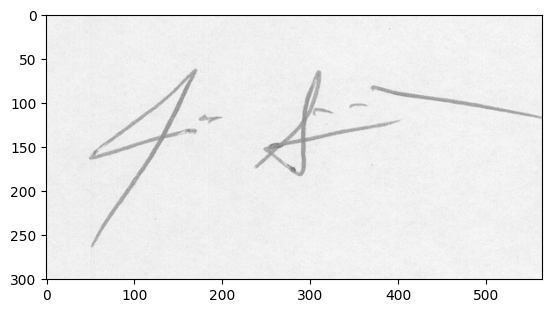

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:/Users/ADMIN/Downloads/CEDAR/CEDAR/new/Real/original_1_1.png").shape

(301, 564, 3)

In [ ]:
#data agumentation

In [17]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
# Load Training Data
train_generator = train_datagen.flow_from_directory(
    'C:/Users/ADMIN/Downloads/CEDAR/CEDAR/new/',
    target_size=(301, 564),
    batch_size=32,
    class_mode='binary')

Found 2570 images belonging to 2 classes.


In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Load Validation Data
validation_generator = validation_datagen.flow_from_directory(
    'C:/Users/ADMIN/Downloads/CEDAR/CEDAR/validate/',
    target_size=(301, 564),
    batch_size=32,
    class_mode='binary')

Found 50 images belonging to 2 classes.


In [21]:
#early stopping

In [22]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [31]:
# Model Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(301, 564, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=40,  # Number of batches per epoch
    epochs=25,
    validation_data=validation_generator,
    validation_steps=10  # Number of validation batches
)

Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.4967 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.5038 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6250 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.4917 - loss: 0.7152 - val_accuracy: 0.5400 - val_loss: 0.6923
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 191s 5s/step - accuracy: 0.4837 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4062 - loss: 0.7065 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 226s 5s/step - accuracy: 0.4848 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.5110 - loss: 0.6949 - val_accuracy: 0.4400 - v

In [15]:
# Train the model
#model_fit = model.fit(train_data, epochs=5, validation_data=validation_dataset)

# Save the model
model.save('C:/Users/ADMIN/Downloads/CEDAR/CEDAR/signature_model_25_epoch.h5')


In [36]:
validation_dataset.class_indices

{'Fake': 0, 'Real': 1}

In [34]:
from keras.models import load_model

# Load the model
model = load_model("C:/Users/ADMIN/Downloads/CEDAR/CEDAR/signature_model_25_epoch.h5")

# Now you can use the loaded model for predictions or further training


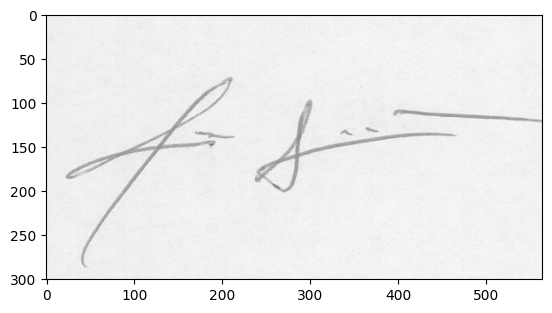

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Real


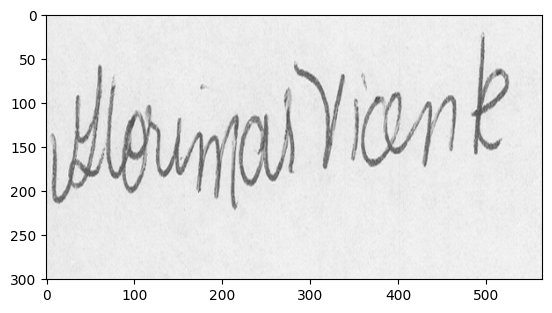

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Real


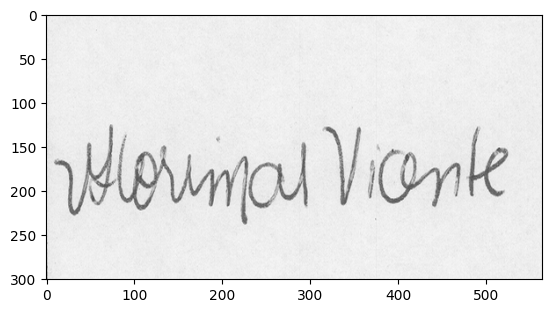

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
Real


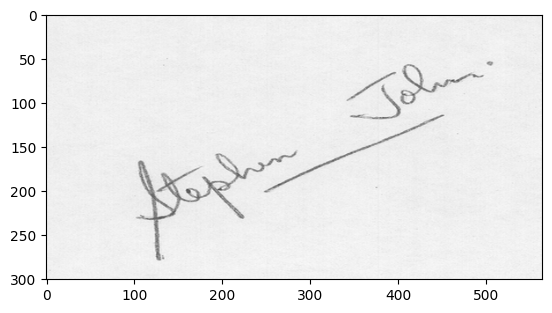

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Real


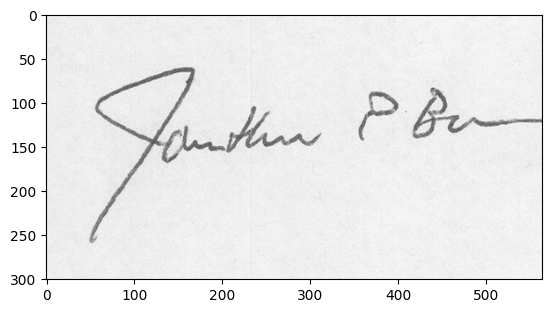

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Real


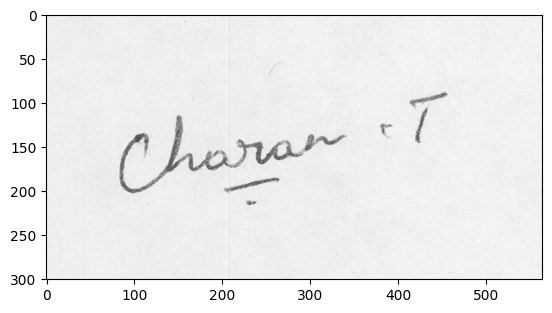

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Real


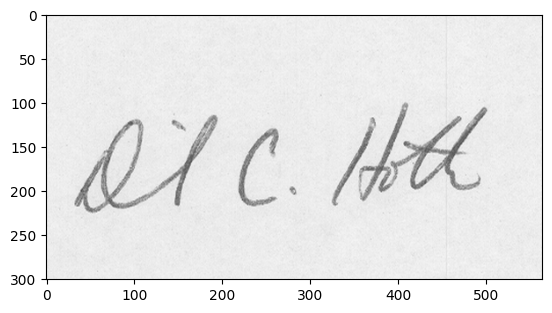

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Real


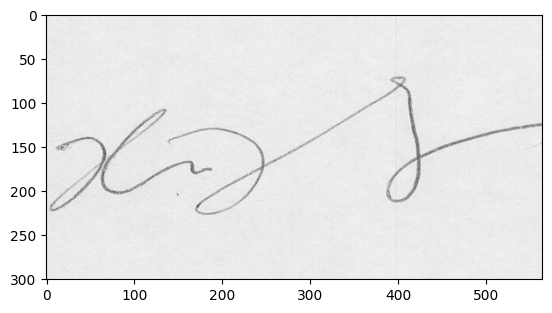

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Real


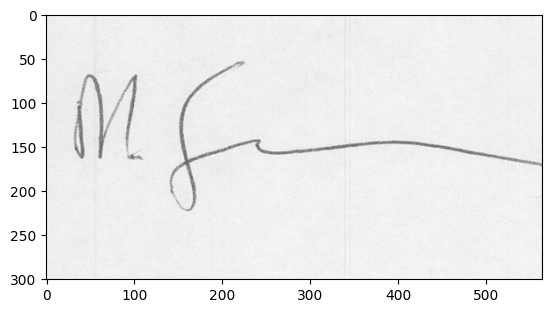

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Real


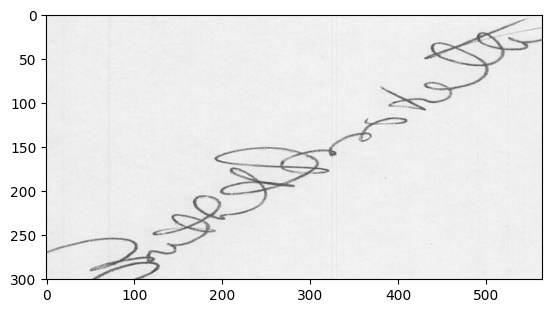

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Real


In [36]:
dir_path = "C:/Users/ADMIN/Downloads/CEDAR/CEDAR/test/Real/"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(301, 564))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x= np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("Fake")
    else:
        print("Real")

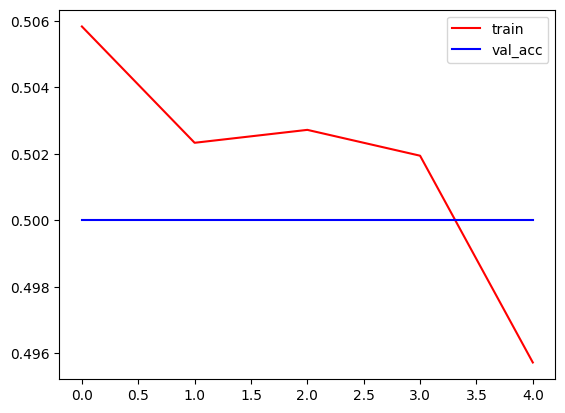

In [41]:
plt.plot(model_fit.history['accuracy'],color='red',label='train')
plt.plot(model_fit.history['val_accuracy'],color='blue',label='val_acc')
plt.legend()
plt.show()

In [53]:
#from tensorflow.keras.models import load_model

In [54]:
#model.save("mymodel.h5")

C:\Users\COMMON IT\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
#model.save("mmodel.keras")